In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

In [2]:
city_df = pd.read_csv(city_data)
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
ride_df = pd.read_csv(ride_data)
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
print(city_df.shape + ride_df.shape)

(120, 3, 2375, 4)


In [5]:
# Combine the data 
city_ride = pd.merge(city_df, ride_df , on = "city", how = "inner")
city_ride.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [6]:
%matplotlib notebook

<IPython.core.display.Javascript object>


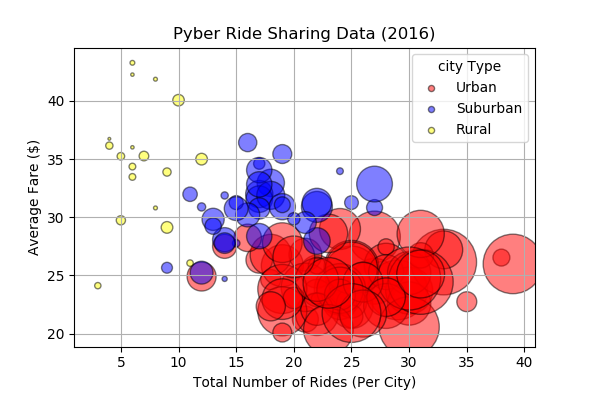

In [7]:
type1 = "Urban"
type2 = "Suburban"
type3 = "Rural"

#Filter by 'type of city'
filter1 = city_ride['type'].str.contains(type1) 
filter2 = city_ride['type'].str.contains(type2) 
filter3 = city_ride['type'].str.contains(type3) 

urban = city_ride[filter1]
suburban = city_ride[filter2]
rural = city_ride[filter3]

s1=urban.groupby("city")["driver_count"].sum()
s2=suburban.groupby("city")["driver_count"].sum()
s3=rural.groupby("city")["driver_count"].sum()

fig = plt.figure
Urban=plt.scatter(urban.groupby("city")["ride_id"].count(), urban.groupby("city")["fare"].mean(), marker="o", facecolors="red", edgecolors="black",
           alpha=0.5, s=s1, label="Urban")

Suburban=plt.scatter(suburban.groupby("city")["ride_id"].count(), suburban.groupby("city")["fare"].mean(), marker="o", facecolors="blue", edgecolors="black",
alpha=0.5, s=s2, label="Suburban")

Rural=plt.scatter(rural.groupby("city")["ride_id"].count(), rural.groupby("city")["fare"].mean(), marker="o", facecolors="yellow", edgecolors="black",
           alpha=0.5, s=s3, label="Rural" )

In [8]:
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")


legend= plt.legend(loc="best" , title="city Type")
legend.legendHandles[0]._sizes=[20]
legend.legendHandles[1]._sizes=[20]
legend.legendHandles[2]._sizes=[20]

plt.grid()
plt.show() 

## Total Fares By City Type

In [9]:
#Fare Sums
urban = city_ride.loc[city_ride["type"] == "Urban",:]
total_urban_fares = urban["fare"].sum()

suburban = city_ride.loc[city_ride["type"] == "Suburban",:]
total_suburban_fares = suburban["fare"].sum()

rural = city_ride.loc[city_ride["type"] == "Rural",:]
total_rural_fares = rural["fare"].sum()

total_fares = city_ride["fare"].sum()


In [10]:
type_list = ["Urban", "Suburban", "Rural"]

In [11]:
#Fare %
urban_percent = total_urban_fares/total_fares * 100
suburban_percent = total_suburban_fares/total_fares * 100
rural_percent = total_rural_fares/total_fares * 100


fare_perc = pd.DataFrame({"Percentage of Fares": [urban_percent,suburban_percent, rural_percent]
    
}, index=["Urban", "Suburban", "Rural"])
fare_perc

,Percentage of Fares
Urban,62.724635
Suburban,30.463872
Rural,6.811493


In [12]:
explode = (0.1, 0, 0)
sizes = [urban_percent,suburban_percent,rural_percent]
labels = ["Urban", "Suburban", "Rural"]
colors = ["pink", "blue", "gold"]

<IPython.core.display.Javascript object>


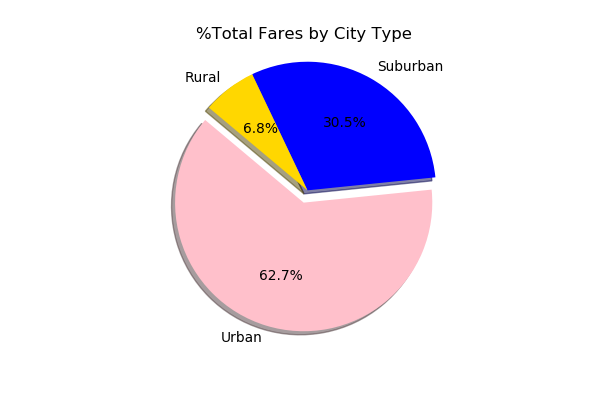

Text(0.5,1,'%Total Fares by City Type')

In [13]:
fig = plt.figure()
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("%Total Fares by City Type")

In [14]:
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

In [30]:
fig.savefig(' %Total Fares by city .png')

## Total Rides by City Type

In [16]:
#Total Rides
urban = city_ride.loc[city_ride["type"] == "Urban",:]
total_urban_rides = urban["ride_id"].count()

suburban = city_ride.loc[city_ride["type"] == "Suburban",:]
total_suburban_rides = suburban["ride_id"].count()

rural = city_ride.loc[city_ride["type"] == "Rural",:]
total_rural_rides = rural["ride_id"].count()

total_rides = city_ride["ride_id"].count()

In [17]:
#Total Rides Percent
urban_rides_percent = total_urban_rides/total_rides * 100
suburban_rides_percent = total_suburban_rides/total_rides * 100
rural_rides_percent = total_rural_rides/total_rides * 100

ride_perc = pd.DataFrame({"Percentage of Rides": [urban_rides_percent,suburban_rides_percent, rural_rides_percent]
    
}, index=["Urban", "Suburban", "Rural"])
ride_perc

,Percentage of Rides
Urban,68.421053
Suburban,26.315789
Rural,5.263158


In [18]:
explode = (0.1, 0, 0)
colors = ["pink", "blue", "gold"]
sizes = [urban_rides_percent,suburban_rides_percent,rural_rides_percent]
labels = ["Urban", "Suburban", "Rural"]

<IPython.core.display.Javascript object>


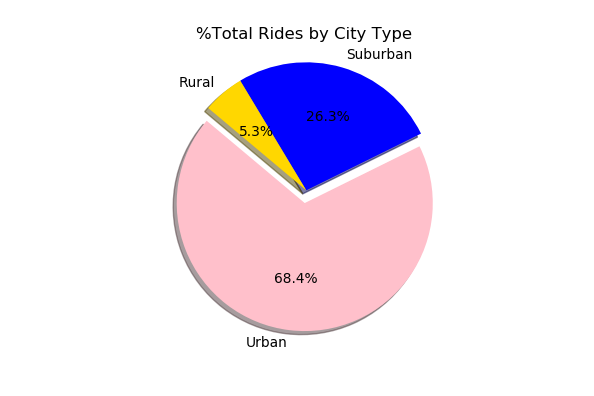

Text(0.5,1,'%Total Rides by City Type')

In [19]:
fig = plt.figure()
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("%Total Rides by City Type")

In [20]:
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

In [31]:
fig.savefig(' %Total Rides by city .png')

## Total Drivers by City Type

In [22]:
#Total Drivers
urban = city_df.loc[city_df["type"] == "Urban",:]
total_urban_drivers = urban["driver_count"].sum()

suburban = city_df.loc[city_df["type"] == "Suburban",:]
total_suburban_drivers = suburban["driver_count"].sum()

rural = city_df.loc[city_df["type"] == "Rural",:]
total_rural_drivers = rural["driver_count"].sum()

total_drivers = city_df["driver_count"].sum()

In [23]:
#Total Driver Percent
urban_driver_percent = total_urban_drivers/total_drivers * 100
suburban_driver_percent = total_suburban_drivers/total_drivers * 100
rural_driver_percent = total_rural_drivers/total_drivers * 100

driver_perc = pd.DataFrame({"Percentage of Rides": [urban_driver_percent,suburban_driver_percent, rural_driver_percent]
    
}, index=["Urban", "Suburban", "Rural"])
driver_perc

,Percentage of Rides
Urban,80.894719
Suburban,16.481668
Rural,2.623613


In [24]:
explode = (0.1, 0, 0)
sizes = [urban_driver_percent,suburban_driver_percent,rural_driver_percent]
labels = ["Urban", "Suburban", "Rural"]
colors = ["pink", "blue", "gold"]

<IPython.core.display.Javascript object>


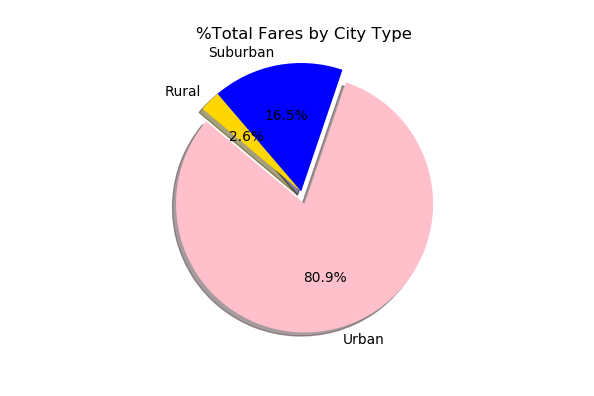

Text(0.5,1,'%Total Fares by City Type')

In [25]:
fig = plt.figure()
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("%Total Fares by City Type")

In [26]:
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

In [32]:
fig.savefig(' %Total driver by city .png')